In [1]:
exec(open("init_notebook.py", "r").read())
%load_ext autoreload
%autoreload 2

current working dirE:\AV\Carla\CARLA_0.9.13\WindowsNoEditor\PythonAPI\experiments


In [2]:
import logging
from tqdm import tqdm

In [3]:
from research.adversaries.EnvironmentFactory import EnvironmentFactory, AvailableEnvironments
# dataDir = "D:/AV/DataSetExploration/jaywalker"
dataDir = "X:/AV/DataSetExploration/jaywalker"
env = EnvironmentFactory.create(
    AvailableEnvironments.R1V1Env1, 
    defaultLogLevel=logging.ERROR,
    output_dir=dataDir
)

research chosen : R1v1 with host: 127.0.0.1, port: 2000, log level: 40, output directory: X:/AV/DataSetExploration/jaywalker


E:\AV\Carla\CARLA_0.9.13\WindowsNoEditor\PythonAPI\experiments\research\BaseResearch.py:51: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  self.logger.warn(f"Starting simulation in synchronous mode")
C:\Users\adhocmaster\.conda\envs\carla37\lib\site-packages\gym\spaces\box.py:84: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
E:\AV\Carla\CARLA_0.9.13\WindowsNoEditor\PythonAPI\experiments\agents\pedestrians\PedestrianFactory.py:125: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  self.logger.warn(f"Internation factor path is None. Using the default at ({PedestrianFactory.internalFactorPath})")
E:\AV\Carla\CARLA_0.9.13\WindowsNoEditor\PythonAPI\experiments\agents\pedestrians\planner\PedestrianPlanner.py:42: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  self.logger.warn(f"remembering {deqLength} tick locati

In [4]:
env.getActionTicks('a')

25

In [5]:
# env.research.getWalkerAgent().updateLogLevel(logging.WARN)

In [6]:
# env.reset()

In [7]:
# take 5 actions which should run 5 seconds of simulation
for _ in tqdm(range(1500), desc="Steps"):
    state, reward, done, _ = env.step('sa')
    if done:
        env.reset()

Steps:   0%|▎                                                                         | 7/1500 [00:10<39:05,  1.57s/it]E:\AV\Carla\CARLA_0.9.13\WindowsNoEditor\PythonAPI\experiments\agents\pedestrians\planner\SingleOncomingVehicleLocalPlanner.py:112: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  self.logger.warn(f"Finished. no new control")
Steps:  24%|█████████████████▍                                                      | 364/1500 [10:06<30:07,  1.59s/it]E:\AV\Carla\CARLA_0.9.13\WindowsNoEditor\PythonAPI\experiments\agents\pedestrians\PedestrianAgent.py:261: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  self.logger.warn(f"Distance to sidewalk is none!")
Steps: 100%|███████████████████████████████████████████████████████████████████████| 1500/1500 [41:30<00:00,  1.66s/it]


In [8]:
env.close()

In [9]:
# env.research.episodeTrajectoryRecorders

In [10]:
recorder = env.research.episodeTrajectoryRecorders[1]

In [11]:
recorder.trajectories

{986: <lib.Trajectory.Trajectory at 0x245e12052c8>,
 985: <lib.Trajectory.Trajectory at 0x245e1205308>}

In [12]:
recorder.getAsDataFrame()

,frame,mapX,mapY,recordingId,trackId,class
0,1,-113.000000,-3.000000,1,986,pedestrian
1,2,-113.000000,-3.000000,1,986,pedestrian
2,3,-113.000000,-3.000000,1,986,pedestrian
3,4,-113.000000,-3.000000,1,986,pedestrian
4,5,-113.000000,-3.000000,1,986,pedestrian
...,...,...,...,...,...,...
357,177,-109.966095,-8.336323,1,985,vehicle
358,178,-109.716431,-8.435649,1,985,vehicle
359,179,-109.466415,-8.536391,1,985,vehicle
360,180,-109.214958,-8.638528,1,985,vehicle


In [13]:
recorder.fps

25.0

In [14]:
1 / env.research.time_delta

25.0

In [15]:
vehicle = env.research.vehicle
walker = env.research.walker

In [16]:
from lib.VehicleUtils import VehicleUtils

In [17]:
contour = VehicleUtils.getYANGContour(vehicle)

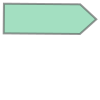

In [18]:
contour

In [19]:
from shapely.ops import nearest_points
from shapely.geometry import Point
points = nearest_points(contour, Point(walker.get_location().x, walker.get_location().y))
for point in points:
    print(point)

print(walker.get_location())

POINT (-132.65485368204088 -6.747345746652441)
POINT (-113 -3)
Location(x=-113.000000, y=-3.000000, z=1.103900)


In [20]:
X = contour.exterior.xy[0]
Y = contour.exterior.xy[1]
print(X, Y)
for point in zip(X, Y):
    print(point)

array('d', [-138.86220920922455, -133.73997757452716, -132.65485368204088, -133.7560123918949, -138.87824402659228, -138.86220920922455]) array('d', [-5.700339602900054, -5.741529111061762, -6.747345746652441, -7.735581782318101, -7.694392274156392, -5.700339602900054])
(-138.86220920922455, -5.700339602900054)
(-133.73997757452716, -5.741529111061762)
(-132.65485368204088, -6.747345746652441)
(-133.7560123918949, -7.735581782318101)
(-138.87824402659228, -7.694392274156392)
(-138.86220920922455, -5.700339602900054)


In [21]:
# visualizer = env.research.visualizer
# for _ in tqdm(range(5), desc="Steps"):
#     state, reward, done, _ = env.step('sa')
#     if done:
#         env.reset()
#     else:
#         vehicle = env.research.vehicle
#         contour = VehicleUtils.getYANGContour(vehicle)
#         visualizer.drawShaplyPolygon(contour, color=(0, 0, 255,0), life_time=1.0, z=1.5)